<h1> Exercise 5</h1>
<p>Onur BOZKURTOĞLU</p>
<p>20170808044</p>
<h2>9    Numpy</h2>
<h3>Exercise 9.5: Singular values</h3>
<p><b> Generate an n × n matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use
the linear algebra library of Scipy to compute the singular values of C. What can you say about the
relationship between n, p and the largest singular value? </b></p>

In [1]:
import numpy as np
from random import choices

def singular_values():
    size = (200,200)
    C = np.zeros(size)
    probability = 0.4

    for i in range(200):  
        for j in range(200):
            C[i][j] = np.random.choice(np.arange(2), p = [1 - probability, probability])
    return C

In [2]:
singular_values()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

<h2>10    Scipy</h2>
<h3>Exercise 10.1: Least squares</h3>
<p><b> Generate matrix A elements of R^m×n with m > n. Also generate some vector b elements of R^m. </b></p>
<p><b> Now find x = arg minx ||Ax − b||2. </b></p>
<p><b> Print the norm of the residual. </b></p>

In [3]:
from scipy.optimize import nnls
from numpy import random

In [4]:
def least_squares(m, n):
    size = (m,n)
    b = np.zeros(m)
    for i in range(m):
        b[i] = np.random.randint(100)
    A = np.zeros(size)
    for i in range(m):
        for j in range(n):
            A[i][j] = np.random.randint(100)
    x = nnls(A, b)
    return x[1]

In [5]:
least_squares(10,4)

79.14676507549433

<h3>Exercise 10.2: Optimization</h3>
<p><b> Find the maximum of the function </b></p>
<p><b> f(x) = sin^2 (x − 2)e^(−x^2) </b></p>


In [6]:
import scipy
import math

In [7]:
def f(x):
    return (np.sin(x - 2) ** 2) * ((math.e) ** (-(x ** 2)))

In [8]:
max_value = scipy.optimize.fmin(lambda x: -f(x), 0)
print(max_value) # x axis
print(f(max_value)) # y axis

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]
[0.91168541]


<h3>Exercise 10.3: Pairwise distances</h3>
<p><b> Let X be a matrix with n rows and m columns. How can you compute the pairwise distances between
every two rows? </b></p>
<p><b> As an example application, consider n cities, and we are given their coordinates in two columns. Now
we want a nice table that tells us for each two cities, how far they are apart. </b></p>
<p><b> Again, make sure you make use of Scipy’s functionality instead of writing your own routine </b></p>

In [9]:
from scipy import spatial
def pairwise_distances(n, m):
    size = (n,m)
    X = np.zeros(size)
    for i in range(n):
        for j in range(m):
            X[i][j] = np.random.randint(100)
    result = scipy.spatial.distance.pdist(X)
    return result

In [10]:
pairwise_distances(10, 5)

array([ 64.58327957,  80.03749122,  49.36598019,  61.80614856,
        80.78366171,  74.77967638,  71.        ,  63.64746656,
        71.01408311,  83.85105843,  82.18272325, 100.83154268,
        94.76813811,  50.22947342,  84.48668534,  88.53247992,
        96.30160954, 101.14840582,  55.19057891,  43.33589736,
        58.25804665,  80.14362108,  73.32803011, 107.43835442,
        94.68368392, 115.58114033,  99.84487969,  66.09084657,
        60.97540488, 119.65784554,  38.02630668,  85.93020424,
        79.9812478 ,  65.6886596 ,  80.8640835 ,  69.88562084,
        85.81957819,  81.24653839,  85.4341852 ,  85.30533395,
        96.80392554,  92.65527508,  40.52159918, 125.52290628,
       121.12803144])

<h3>Exercise 11.1: Plotting a function</h3>
<p><b> Plot the function </b></p>
<p><b> f(x) = sin^2(x − 2) e^(−x^2) </b></p>
<p><b> over the interval [0; 2]. Add proper axis labels, a title, etc. </b></p>

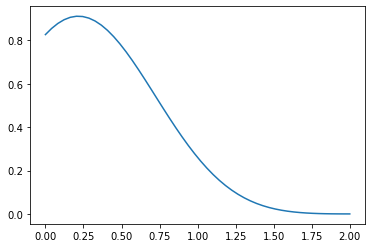

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2)
plt.plot(x, f(x))
plt.show()

<h3>Exercise 11.2: Data</h3>
<p><b> Create a data matrix X with 20 observations of 10 variables. Generate a vector b with parameters Then
generate the response vector y = Xb+z where z is a vector with standard normally distributed variables. </b></p>
<p><b> Now (by only using y and X), find an estimator for b, by solving </b></p>
<p><b> b = arg minb ||Xb − y||2 </b></p>
<p><b> Plot the true parameters b and estimated parameters ^b. See Figure 1 for an example plot. </b></p>

<h3>Exercise 11.3: Histogram and density estimation</h3>
<p><b> Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). See Figure 2 for an example plot. </b></p>

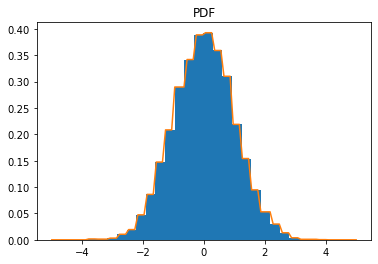

In [12]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
z = scipy.stats.norm.rvs(size=10000, loc=0, scale=1, random_state=123)
hist = np.histogram(z, bins=25)
hist_dist = scipy.stats.rv_histogram(hist)
X = np.linspace(-5.0, 5.0, 100)
plt.title("PDF")
plt.hist(z, density=True, bins=25)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()